<a href="https://githubtocolab.com/AnaMontanezB/IA_UdeA/blob/main/02_Preprocesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# **Análisis exploratorio de los datos**
#integrantes
Ana María Montañez Becerra   c.c 1152224184

Joanny Torres Cardona        c.c 1152218692

Se carga nuevamente el dataset

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anamariamontanez99","key":"c6906345c84b7c9375444e40db2c3d8f"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d skywescar/lifesnaps-fitbit-dataset

 99% 535M/540M [00:07<00:00, 41.5MB/s]
100% 540M/540M [00:07<00:00, 74.2MB/s]


In [4]:
!unzip '/content/lifesnaps-fitbit-dataset.zip'

Archive:  /content/lifesnaps-fitbit-dataset.zip
  inflating: rais_anonymized/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv  
  inflating: rais_anonymized/csv_rais_anonymized/hourly_fitbit_sema_df_unprocessed.csv  
  inflating: rais_anonymized/mongo_rais_anonymized/fitbit.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/fitbit.metadata.json  
  inflating: rais_anonymized/mongo_rais_anonymized/sema.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/sema.metadata.json  
  inflating: rais_anonymized/mongo_rais_anonymized/surveys.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/surveys.metadata.json  
  inflating: rais_anonymized/scored_surveys/breq.csv  
  inflating: rais_anonymized/scored_surveys/panas.csv  
  inflating: rais_anonymized/scored_surveys/personality.csv  
  inflating: rais_anonymized/scored_surveys/stai.csv  
  inflating: rais_anonymized/scored_surveys/ttm.csv  


In [5]:
import pandas as pd #importación de pandas para mostrar los datos en un dataframe
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
%matplotlib inline
d= pd.read_csv (r'/content/rais_anonymized/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv')
newData=d.groupby('id').mean()

<ipython-input-5-0778863ddba9>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newData=d.groupby('id').mean()


In [6]:
newData=d.groupby('id').mean()
newData

<ipython-input-6-ff83539fcae9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newData=d.groupby('id').mean()


,Unnamed: 0,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
id,,,,,,,,,,,,,,,,,,,,,
621e2e8e67b776a24055b564,35.000000,34.315168,56.571484,100.410210,NaN,15.270968,76.317460,0.795767,0.732540,0.771429,...,0.047619,0.261905,0.119048,0.000000,0.238095,0.0,0.000000,0.500000,0.000000,0.523810
621e2eaf67b776a2406b14ac,114.500000,34.252140,68.988272,25.992988,NaN,14.767500,74.731707,0.742683,0.777439,0.711789,...,0.416667,0.583333,0.083333,0.000000,0.750000,0.0,0.000000,0.416667,0.000000,0.666667
621e2ed667b776a24085d8d1,215.500000,33.998974,72.814016,26.519625,NaN,17.680000,NaN,NaN,NaN,NaN,...,0.285714,0.163265,0.102041,0.020408,0.755102,0.0,0.000000,0.163265,0.000000,0.428571
621e2ef567b776a24099f889,322.500000,31.975482,NaN,NaN,97.700000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621e2efa67b776a2409dd1c3,441.000000,34.167044,NaN,NaN,95.971212,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621e36c267b776a240ba2756,6956.500000,33.345793,NaN,NaN,NaN,NaN,61.818182,0.590152,0.657386,0.593939,...,0.000000,0.315789,0.157895,0.000000,0.631579,0.0,0.000000,0.052632,0.052632,0.105263
621e36dd67b776a240ce9a45,7067.000000,NaN,NaN,NaN,NaN,NaN,23.333333,0.188889,0.225000,0.288889,...,0.000000,0.041667,0.000000,0.000000,0.125000,0.0,0.000000,0.125000,0.291667,0.458333
621e36f967b776a240e5e7c9,7184.285714,33.988318,60.920045,70.315795,96.197619,14.715556,68.717391,0.714493,0.681522,0.667391,...,0.273810,0.476190,0.071429,0.000000,0.785714,0.0,0.095238,0.107143,0.357143,0.238095


In [7]:
newData.describe()

,Unnamed: 0,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
count,71.000000,64.000000,43.000000,43.000000,28.000000,43.000000,37.000000,37.000000,37.000000,37.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,3602.546600,33.437228,61.727647,41.241060,95.932260,14.779468,58.837131,0.591607,0.585031,0.589589,...,0.228029,0.316435,0.068987,0.008074,0.710343,0.095529,0.016242,0.140065,0.072657,0.280589
std,2113.429625,1.529448,6.977470,17.837723,0.774720,2.220066,18.460628,0.197996,0.192082,0.180278,...,0.200016,0.214495,0.073466,0.026571,0.249659,0.192515,0.031043,0.129812,0.095666,0.253297
min,35.000000,26.106541,48.374200,19.721788,94.308696,10.128000,12.857143,0.120635,0.138095,0.123810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1915.500000,33.141667,57.105861,27.874208,95.636508,13.620667,48.181818,0.512169,0.461275,0.470707,...,0.080593,0.156633,0.000000,0.000000,0.597872,0.000000,0.000000,0.045177,0.000000,0.048400
50%,3456.000000,33.777239,62.361852,36.265407,95.954195,14.715556,61.818182,0.619556,0.620724,0.626667,...,0.171875,0.312500,0.057143,0.000000,0.755102,0.000000,0.000000,0.109375,0.047619,0.219512
75%,5288.000000,34.176460,66.922048,48.237223,96.306383,16.760668,72.909091,0.742683,0.732540,0.711789,...,0.339744,0.488095,0.115975,0.000000,0.881944,0.068750,0.021981,0.208696,0.092687,0.463038
max,7356.500000,35.079120,77.548857,100.410210,97.700000,18.148077,81.654545,0.853646,0.876754,0.817647,...,1.000000,0.732143,0.291667,0.166667,1.000000,1.000000,0.169492,0.500000,0.400000,1.000000


In [8]:
print(newData['stress_score'])

id
621e2e8e67b776a24055b564    76.317460
621e2eaf67b776a2406b14ac    74.731707
621e2ed667b776a24085d8d1          NaN
621e2ef567b776a24099f889          NaN
621e2efa67b776a2409dd1c3          NaN
                              ...    
621e36c267b776a240ba2756    61.818182
621e36dd67b776a240ce9a45    23.333333
621e36f967b776a240e5e7c9    68.717391
621e375367b776a24021e950          NaN
621e375b67b776a240290cdc    72.909091
Name: stress_score, Length: 71, dtype: float64


In [9]:
''' Cantidad de valores faltantes en cada columna  '''
k=newData.isna().sum()
k[k!=0]

nightly_temperature                  7
nremhr                              28
rmssd                               28
spo2                                43
full_sleep_breathing_rate           28
stress_score                        34
sleep_points_percentage             34
exertion_points_percentage          34
responsiveness_points_percentage    34
daily_temperature_variation         10
scl_avg                             69
sleep_duration                       2
minutesToFallAsleep                  2
minutesAsleep                        2
minutesAwake                         2
minutesAfterWakeup                   2
sleep_efficiency                     2
sleep_deep_ratio                    10
sleep_wake_ratio                    10
sleep_light_ratio                   10
sleep_rem_ratio                     10
min_goal                            10
max_goal                            10
ALERT                                8
HAPPY                                8
NEUTRAL                  

In [10]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [11]:
from local.lib import mlutils

In [12]:
def xdistplot(k, title="", xlim=None):
    vals = k
    sns.distplot(k, hist_kws={"alpha": .8});
    m,s = np.mean(vals), np.std(vals)
    plt.axvline(m, color="black", lw=2, alpha=.5)
    plt.axvline(m+s, color="red", lw=2, alpha=.5)
    plt.axvline(m-s, color="red", lw=2, alpha=.5)
    x = np.linspace(np.min(vals), np.max(vals), 100)
    plt.title(title)
    plt.grid();
    if xlim is not None:
        plt.xlim(xlim)

In [13]:
def subs_policies(d, col):
    mcol = "%s_missing"%col
    dn = d.T.dropna().T
    dn = dn[[i for i in dn.columns if d[i].dtype!=object]]
    print (dn.shape)
    
    na_idxs = np.argwhere(d[col].isna().values)[:,0]

    dl0 = dn.copy()
    dlm = dn.copy()
    dlr = dn.copy()

    dl0[mcol] = d[col].fillna(0)
    dlm[mcol] = d[col].fillna( d[col].mean())

    k = d[col].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dlr[mcol] = k

    f0 = lambda: xdistplot(d[col].dropna(), "original", [0,150])
    f1 = lambda: xdistplot(dl0[mcol], "subs by zero", [0,150])
    f2 = lambda: xdistplot(dlm[mcol], "subs by mean", [0,150])
    f3 = lambda: xdistplot(dlr[mcol], "subs by equivalent normal", [0,150])

    mlutils.figures_grid(4,1, [f0, f1, f2, f3], figsize=(20,3))
    return dn, dl0, dlm, dlr, na_idxs

(71, 15)


<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated f

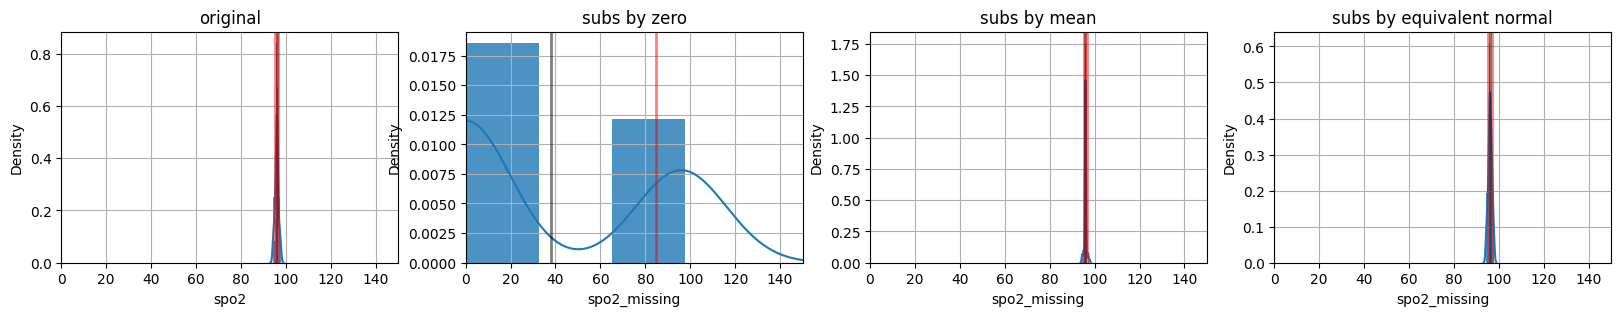

In [14]:
## KEEPOUTPUT
dn, dl0, dlm, dlr, na_idxs = subs_policies(newData, "spo2")

(71, 15)


<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated f

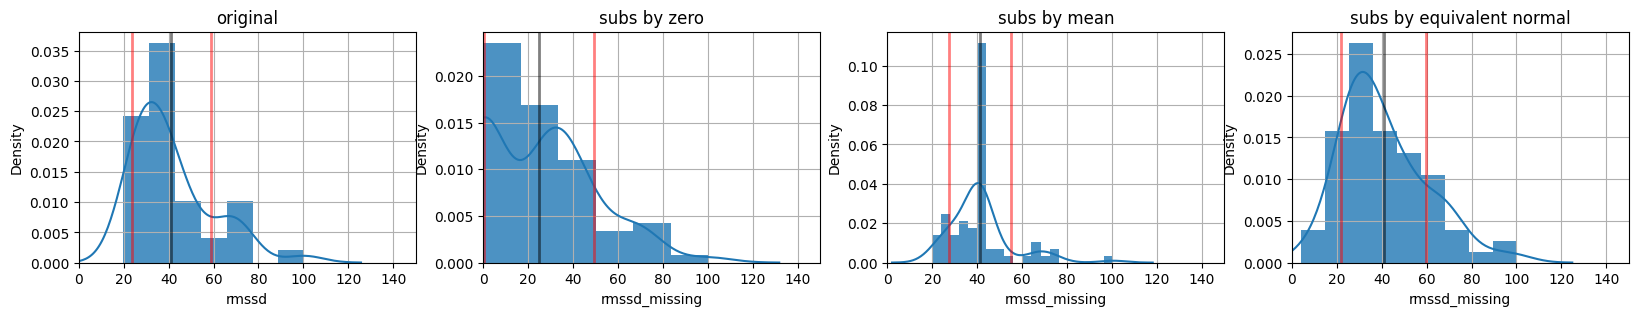

In [ ]:
dn, dl0, dlm, dlr, na_idxs = subs_policies(newData, "rmssd")

(71, 15)


<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-12-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated f

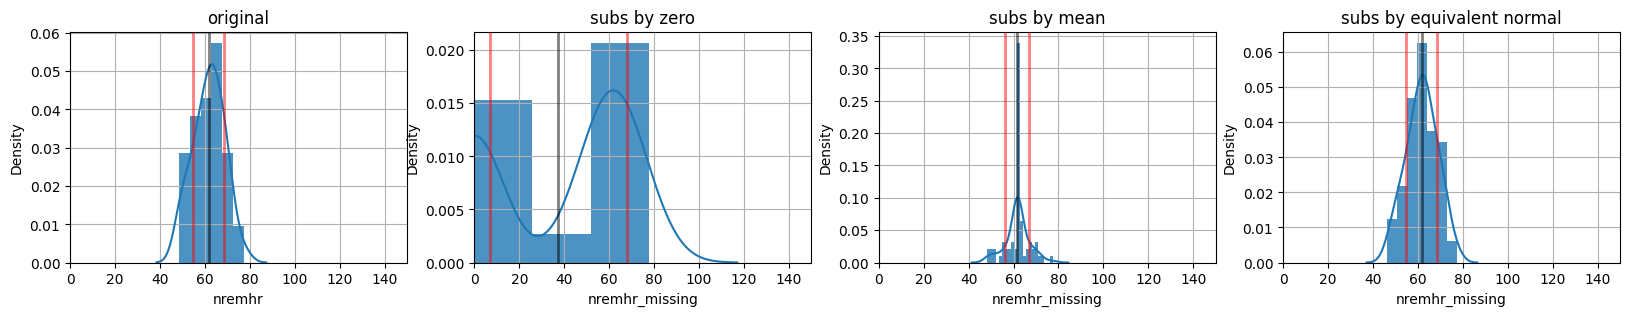

In [ ]:
dn, dl0, dlm, dlr, na_idxs = subs_policies(newData, "nremhr")

In [ ]:
newData = newData.drop('scl_avg', axis=1)
newData = newData.drop('spo2', axis=1)

In [ ]:
newData

,Unnamed: 0,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
id,,,,,,,,,,,,,,,,,,,,,
621e2e8e67b776a24055b564,35.000000,34.315168,56.571484,100.410210,15.270968,76.317460,0.795767,0.732540,0.771429,-1.848630,...,0.047619,0.261905,0.119048,0.000000,0.238095,0.0,0.000000,0.500000,0.000000,0.523810
621e2eaf67b776a2406b14ac,114.500000,34.252140,68.988272,25.992988,14.767500,74.731707,0.742683,0.777439,0.711789,-2.060836,...,0.416667,0.583333,0.083333,0.000000,0.750000,0.0,0.000000,0.416667,0.000000,0.666667
621e2ed667b776a24085d8d1,215.500000,33.998974,72.814016,26.519625,17.680000,NaN,NaN,NaN,NaN,-1.372850,...,0.285714,0.163265,0.102041,0.020408,0.755102,0.0,0.000000,0.163265,0.000000,0.428571
621e2ef567b776a24099f889,322.500000,31.975482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621e2efa67b776a2409dd1c3,441.000000,34.167044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.124220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621e36c267b776a240ba2756,6956.500000,33.345793,NaN,NaN,NaN,61.818182,0.590152,0.657386,0.593939,-0.222112,...,0.000000,0.315789,0.157895,0.000000,0.631579,0.0,0.000000,0.052632,0.052632,0.105263
621e36dd67b776a240ce9a45,7067.000000,NaN,NaN,NaN,NaN,23.333333,0.188889,0.225000,0.288889,NaN,...,0.000000,0.041667,0.000000,0.000000,0.125000,0.0,0.000000,0.125000,0.291667,0.458333
621e36f967b776a240e5e7c9,7184.285714,33.988318,60.920045,70.315795,14.715556,68.717391,0.714493,0.681522,0.667391,-2.152995,...,0.273810,0.476190,0.071429,0.000000,0.785714,0.0,0.095238,0.107143,0.357143,0.238095


In [ ]:
newData.fillna(newData.mean(),inplace=True)

In [ ]:
newData

,Unnamed: 0,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
id,,,,,,,,,,,,,,,,,,,,,
621e2e8e67b776a24055b564,35.000000,34.315168,56.571484,100.410210,15.270968,76.317460,0.795767,0.732540,0.771429,-1.848630,...,0.047619,0.261905,0.119048,0.000000,0.238095,0.000000,0.000000,0.500000,0.000000,0.523810
621e2eaf67b776a2406b14ac,114.500000,34.252140,68.988272,25.992988,14.767500,74.731707,0.742683,0.777439,0.711789,-2.060836,...,0.416667,0.583333,0.083333,0.000000,0.750000,0.000000,0.000000,0.416667,0.000000,0.666667
621e2ed667b776a24085d8d1,215.500000,33.998974,72.814016,26.519625,17.680000,58.837131,0.591607,0.585031,0.589589,-1.372850,...,0.285714,0.163265,0.102041,0.020408,0.755102,0.000000,0.000000,0.163265,0.000000,0.428571
621e2ef567b776a24099f889,322.500000,31.975482,61.727647,41.241060,14.779468,58.837131,0.591607,0.585031,0.589589,-1.435831,...,0.228029,0.316435,0.068987,0.008074,0.710343,0.095529,0.016242,0.140065,0.072657,0.280589
621e2efa67b776a2409dd1c3,441.000000,34.167044,61.727647,41.241060,14.779468,58.837131,0.591607,0.585031,0.589589,-1.124220,...,0.228029,0.316435,0.068987,0.008074,0.710343,0.095529,0.016242,0.140065,0.072657,0.280589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621e36c267b776a240ba2756,6956.500000,33.345793,61.727647,41.241060,14.779468,61.818182,0.590152,0.657386,0.593939,-0.222112,...,0.000000,0.315789,0.157895,0.000000,0.631579,0.000000,0.000000,0.052632,0.052632,0.105263
621e36dd67b776a240ce9a45,7067.000000,33.437228,61.727647,41.241060,14.779468,23.333333,0.188889,0.225000,0.288889,-1.435831,...,0.000000,0.041667,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.291667,0.458333
621e36f967b776a240e5e7c9,7184.285714,33.988318,60.920045,70.315795,14.715556,68.717391,0.714493,0.681522,0.667391,-2.152995,...,0.273810,0.476190,0.071429,0.000000,0.785714,0.000000,0.095238,0.107143,0.357143,0.238095


In [ ]:
k=newData.isna().sum()
k[k!=0]
newData['bpm']

id
621e2e8e67b776a24055b564    70.695375
621e2eaf67b776a2406b14ac    83.805213
621e2ed667b776a24085d8d1    82.881880
621e2ef567b776a24099f889    89.005028
621e2efa67b776a2409dd1c3    82.990689
                              ...    
621e36c267b776a240ba2756    82.912440
621e36dd67b776a240ce9a45    79.769492
621e36f967b776a240e5e7c9    80.177835
621e375367b776a24021e950    92.068997
621e375b67b776a240290cdc    84.112112
Name: bpm, Length: 71, dtype: float64

In [ ]:
import pandas as pd

def filter_nremhr_values(newData):
    greater_than_100 = []
    less_than_or_equal_100 = []
    for index, row in newData.iterrows():
        if row["nremhr"] < 60:
            greater_than_100.append(row["nremhr"])
        else:
            less_than_or_equal_100.append(row["nremhr"])
    return greater_than_100, less_than_or_equal_100

In [ ]:
training_examples,training_data =filter_nremhr_values(newData)


print("Cantidad de valores mayores a 100:", len(training_examples))
print("Cantidad de valores mayores a 100:", len(training_data))
newData['distance']

Cantidad de valores mayores a 100: 17
Cantidad de valores mayores a 100: 54


id
621e2e8e67b776a24055b564     6759.210000
621e2eaf67b776a2406b14ac    11653.284884
621e2ed667b776a24085d8d1     3156.334884
621e2ef567b776a24099f889     3903.400000
621e2efa67b776a2409dd1c3     5221.906098
                                ...     
621e36c267b776a240ba2756     9800.117460
621e36dd67b776a240ce9a45     5891.101250
621e36f967b776a240e5e7c9     8044.178125
621e375367b776a24021e950     5223.033929
621e375b67b776a240290cdc     7448.185915
Name: distance, Length: 71, dtype: float64